In [25]:
# Importing Dependencies
import pandas as pd
import numpy as np
import json  

In [2]:
# Import the Wikipedia JSON file.

#Define a variable file_dir for the directory that's holding our data.
file_dir = "/Users/Fabiola/Desktop/Data/week8ETL/class"

#file_dir = 'C://Users/Username/DataBootcamp/'

In [22]:
#To open a file in your directory, you can use an f-string (see below) instead of having to type out the 
#whole directory every time. If you move your files, you only need to update the file_dir variable.
#f'{file_dir}filename'

f"{file_dir}wikipedia-movies"


'/Users/Fabiola/Desktop/Data/week8ETL/classwikipedia-movies'

In [4]:
# To load the raw JSon into a list of dictionaries, we will use the load() method.
# Using the with statement,open the Wikipedia JSON file to be read into the variable file, and use json.load() to save the
#data to a new variable.
# With is used whe we want to open files in python

## Load the JSON into a List of Dictionaries

In [23]:
with open(f"{file_dir}/wikipedia-movies.json", mode = "r") as file:
    wiki_movies_raw = json.load(file)

In [24]:
len(wiki_movies_raw)

7311

The read_json method that comes built into the Pandas library only works well for data that is already clean—for example, when the JSON data has every field filled in every time it is returned. We call data like this "flat."

In [26]:
# Firts 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [27]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [28]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

# 8.2.2 Extract the Kaggle Data

In [29]:
# download files from kaggle , a csv file

In [30]:
kaggle_metadata = pd.read_csv(f"{file_dir}/movies_metadata.csv", low_memory = False)
#kaggle_metadad = pd.read_csv(f"{file_-dir}movies_metadata.csv", low_memory = False)
ratings = pd.read_csv(f"{file_dir}/ratings.csv")

In [31]:
# Knowing the data set kaggle_metadata
kaggle_metadata.head()
kaggle_metadata.tail()
#.sample() To show rows randomly
kaggle_metadata.sample(n = 5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
30800,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,92496,tt0100265,en,Ninja Academy,"""Police Academy"" styled film offers its laughs...",...,1989-08-17,0.0,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"You don't have to be crazy to join, but if you...",Ninja Academy,False,4.7,3.0
37604,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,34462,tt0067995,en,Women in Cages,Carol Jeffries is a naive American woman stayi...,...,1971-10-19,0.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The dirty dolls of devil's island. You can mee...,Women in Cages,False,5.6,15.0
17121,False,"{'id': 171732, 'name': 'Mothra Collection', 'p...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...",NaN,39410,tt0055198,ja,Mosura,"Shipwreck survivors are found on Beiru, an isl...",...,1961-07-30,0.0,101.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,Mightiest Monster In All Creation Ravishing a ...,Mothra,False,6.2,24.0
11710,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,56474,tt0314067,ro,Filantropica,In the 21st century Bucharest to get out in th...,...,2002-03-15,0.0,110.0,"[{'iso_639_1': 'ro', 'name': 'Română'}]",Released,Large hand that does not tell a story is not r...,Philanthropy,False,7.2,29.0
21959,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,15709,tt1275590,fr,De l'autre côté du lit,Ariane and Hugo decide to exchange the lives t...,...,2008-01-07,0.0,93.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Changing Sides,False,5.3,110.0


In [32]:
# Knowing the data set ratings
ratings.head()
ratings.tail()
ratings.sample(n= 5)

,userId,movieId,rating,timestamp
3339433,34726,32,4.0,844107399
15132349,157451,671,3.0,856593407
7722369,79653,5620,0.5,1190846890
3603882,37522,1747,4.0,1316631210
3496206,36431,50,5.0,840358936


# 8.3.1 Data-Cleaning Strategies

# 8.3.2 Iterative Process for Cleaning Data
### Inspect --> Plan --> Execute

# 8.3.3 Investigate the Wikipedia Data
## Initial Investigation

In [50]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)

In [51]:
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
len(wiki_movies_df.keys())

193

In [53]:
wiki_movies_df.keys()

Index(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by',
       'Screenplay by', 'Story by', 'Based on', 'Starring',
       ...
       'Predecessor', 'Founders', 'Area served', 'Products', 'Services',
       'Russian', 'Hebrew', 'Revenue', 'Operating income', 'Polish'],
      dtype='object', length=193)

In [54]:
# As there are 193 columns and we can´t see them all, we convert wiki_movies_df.columns to a list to see all the columns
wiki_movies_df.columns.tolist()


['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [55]:
# Using .index to know the posicion index for the "Director" column
(wiki_movies_df.columns.tolist()).index("Director")


86

In [56]:
len(wiki_movies_df.keys())

193

## Use List Comprehension to Filter Data

### We have used list comprehension in the form to compress code that would have been done in a for loop.
[expresion for element in source_list]

### We can also filter out results using a conditional filter expression.
[expresion for element in source_list if filter-expression]

The resulting list will only have elements where the filter expressio evaluates to True


In [57]:
# This snippet code is just the if condition, it wont run.
if ("Director" in movie or "Directed by" in movie) and "imdb_link" in movie

SyntaxError: invalid syntax (3972704034.py, line 2)

In [58]:
# This is a way to filter, we are filtering the list wiki_movies, we want only Director, Directed by, imdb_link
# This way to filter is called by expression, where expressio is whatever we want to call it = movie

wiki_movies = [movie for movie in wiki_movies_raw
              if("Director" in movie or "Directed by" in movie)  #The resulting list will only have elements 
              and "imdb_link" in movie]                          #where the filter expression evaluates to True.
len(wiki_movies)

7080

In [59]:
# I code this to know the rows that don't have a True value. in the Director, Directed by and imdb_link
wiki_movies_not = [movie for movie in wiki_movies_raw
                  if("Director" not in movie or "Directed by" not in movie)
                  and "imdb_link" not in movie]
len(wiki_movies_not)

211

In [60]:
wiki_movies_not_df = pd.DataFrame(wiki_movies_not)
wiki_movies_not_df.head()

,url,year,title,Directed by,Produced by,Written by,Starring,Narrated by,Music by,Cinematography,...,Number of employees,Divisions,Subsidiaries,Predecessor,Founders,Area served,Products,Services,Revenue,Operating income
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/A_Man_Called_Sarge,1990.0,A Man Called Sarge,Stuart Gillard,"[Gene Corman, Executive Producers:, Yoram Glob...",Stuart Gillard,"[Gary Kroeger, Gretchen German, Jennifer Runyo...",Don LaFontaine,Chuck Cirino,David Gurfinkel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Side_Out,1990.0,Side Out,Peter Israelson,"[Gary Foster, Russ Krasnoff, Jay Weston, John ...",David Thoreau,"[C. Thomas Howell, Peter Horton, Courtney Thor...",NaN,Jeff Lorber,Ron Garcia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
wiki_movies_not_df.keys()

Index(['url', 'year', 'title', 'Directed by', 'Produced by', 'Written by',
       'Starring', 'Narrated by', 'Music by', 'Cinematography',
       ...
       'Number of employees', 'Divisions', 'Subsidiaries', 'Predecessor',
       'Founders', 'Area served', 'Products', 'Services', 'Revenue',
       'Operating income'],
      dtype='object', length=123)

In [62]:
# Make a Data Frame with wiki_movies, I wont run it because canvas said make but it doesn´t run
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
wiki_movies_df.keys()

Index(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by',
       'Screenplay by', 'Story by', 'Based on', 'Starring', 'Narrated by',
       'Music by', 'Cinematography', 'Edited by', 'Productioncompany ',
       'Distributed by', 'Release date', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Written by', 'Genre', 'Theme music composer',
       'Country of origin', 'Original language(s)', 'Producer(s)', 'Editor(s)',
       'Production company(s)', 'Original network', 'Original release',
       'Productioncompanies ', 'Executive producer(s)',
       'Production location(s)', 'Distributor', 'Picture format',
       'Audio format', 'Voices of', 'Followed by', 'Composer(s)', 'Created by',
       'Also known as', 'Opening theme', 'No. of episodes', 'Preceded by',
       'Adaptation by', 'Suggested by', 'Traditional', 'Mandarin', 'Released',
       'Recorded', 'Venue', 'Length', 'Label', 'Director', 'Producer',
       'Animation by', 'Color process', 'S

In [64]:
len(wiki_movies_df.keys())

78

In [65]:
len(wiki_movies_df)

7080

In [66]:
# Filtering where Ditector, imdb_link and No. of episodes dont have a null.
wiki_movies = [movie for movie in wiki_movies_raw
              if ("Director" in movie or "Directed by" in movie)
              and "imdb_link" in movie
              and "No. of episodes" not in movie]

In [67]:
wiki_df = pd.DataFrame(wiki_movies)
wiki_df

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
(wiki_df.columns.tolist()).index("No. of episodes")


ValueError: 'No. of episodes' is not in list

In [69]:
#wiki_df.keys() to know that No. of episodes is not in the keys list

# 8.3.4 Revisit Functions
We will clean each row movie handly, so we can create a function to make one process broad enough for all the movies

Function Parts:                  //_____The "scope" of the variables
1. Name                          //____________* Variables created outside the funtion are called `global` variables.
2. Parameters                    //_____* New variables created inside the function are `local` variables
3. Code block                    //_____* The hierarchy of variables is called the `scope`
4. Return value

The scope of `local variables` only works inside the function in which they are created. If we try to access a local variable outside the function in which it's defined, Python will raise a NameError because it won't be able to find the function.

In [70]:
# This is a trick, we named local and global variable with the same name, when we call them, the output is both
# Canvas example
x = 'global value'

def foo():
    x = 'local value'
    print(x)

foo()
print(x)

local value
global value


In [71]:
# Canvas example 
my_list = [1,2,3]
def append_four(x):
    print(x)
    x.append(4)
append_four(my_list)
print(my_list)

[1, 2, 3]
[1, 2, 3, 4]


In [72]:
my_list = [1,2,3]
def append_four(x):
    my_list.append(x)
append_four(4)
print(my_list)

[1, 2, 3, 4]


In [73]:
# It changed my_list to [1,2,3,4] even outside the function. To leave the original object unchanged, we need to make
# a copy. For lists, we make a copy with the list function; we make a copy with the dict function.
#new_list = list(old_list)
#new_dict = dict(old_dict)
new_list = list(my_list)
new_list

[1, 2, 3, 4]

In [74]:
my_list

[1, 2, 3, 4]

# Lambda Functions
### lambda arguments: expression

In [75]:
# example of lambda function
# Lambda function that squares a value
# lambda x: x * x

In [76]:
# lambda x: x * x  -->. x = argument, --> x * x = expresion,  --> We assigs that to a variable = square

square = lambda x: x * x
square(5)   # We name the variable with a value to use. we dont say calle the function, we just name it.

25

# 8.3.5 Create a Function to Clean the Data, part 1

In [77]:
# When we pass movie as a parameter to the dict() constructor, it reseves a new space inmemory and copies all the
# info in movie to that new space
def clean_movie(movie):
    movie_copy = dict(movie)

In [78]:
# movies are dic
def clean_movie(movie):     #Constructors are special functions that initialize new objects.
    movie = dict(movie)     # create a non-destructive copy, here es when we are making acopy, assignig it to movie
    return movie            # constructors can take parameters and initialize a new object using those parameters.
                            # but also, it is the local variable
                            # constructors can take parameters and initialize a new object using those parameters.

In [79]:
wiki_movies_df[wiki_movies_df["Arabic"].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6838,https://en.wikipedia.org/wiki/The_Insult_(film),2018,https://www.imdb.com/title/tt7048622/,The Insult,Ziad Doueiri,"[Rachid Bouchareb, Jean Bréhat, Julie Gayet, A...",NaN,NaN,NaN,"[Adel Karam, Kamel El Basha]",...,NaN,Case No. 23,NaN,NaN,NaN,قضية رقم ٢٣,Qadiyya raqm 23,NaN,NaN,NaN
7062,https://en.wikipedia.org/wiki/Capernaum_(film),2018,https://www.imdb.com/title/tt8267604/,Capernaum,Nadine Labaki,"[Michel Merkt, Khaled Mouzanar]","[Nadine Labaki, Jihad Hojaily, Michelle Keserw...","[Georges Khabbaz, Nadine Labaki, Michelle Kese...",NaN,"[Zain Al Rafeea, Yordanos Shiferaw, Boluwatife...",...,NaN,NaN,NaN,NaN,NaN,کفرناحوم‎,NaN,NaN,NaN,NaN


In [80]:
wiki_movies_df[wiki_movies_df["Arabic"].notnull()]["url"]  # display de df where column is "Arabic", not null and show
                                                         # its url

6838    https://en.wikipedia.org/wiki/The_Insult_(film)
7062     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [81]:
# NOTE "The Insult" movie has two languages, Arabic and Romanized, because this movie has two language options.
# we have to put this data into a dic to have it order.

In [82]:
#### Is this correct to display these two movie names?
a = wiki_movies_df.loc[(wiki_movies_df["title"] == "McCune–Reischauer")]
a

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish


In [83]:
# To know if there is a value in the Data Frame
'McCune–Reischauer' in wiki_movies_df.values

False

In [84]:
wiki_movies_df.columns.values

array(['url', 'year', 'imdb_link', 'title', 'Directed by', 'Produced by',
       'Screenplay by', 'Story by', 'Based on', 'Starring', 'Narrated by',
       'Music by', 'Cinematography', 'Edited by', 'Productioncompany ',
       'Distributed by', 'Release date', 'Running time', 'Country',
       'Language', 'Budget', 'Box office', 'Written by', 'Genre',
       'Theme music composer', 'Country of origin',
       'Original language(s)', 'Producer(s)', 'Editor(s)',
       'Production company(s)', 'Original network', 'Original release',
       'Productioncompanies ', 'Executive producer(s)',
       'Production location(s)', 'Distributor', 'Picture format',
       'Audio format', 'Voices of', 'Followed by', 'Composer(s)',
       'Created by', 'Also known as', 'Opening theme', 'No. of episodes',
       'Preceded by', 'Adaptation by', 'Suggested by', 'Traditional',
       'Mandarin', 'Released', 'Recorded', 'Venue', 'Length', 'Label',
       'Director', 'Producer', 'Animation by', 'Color proce

In [85]:
len(wiki_movies_df.columns.values)

78

### SKILL DRILL Go through each of the columns, one by one, and determine which columns hold alternate titles.

Hint: You might find it easier to sort the column names first as you're going through them. The following will display columns in alphabetical order.

In [86]:
print(sorted(wiki_movies_df.columns.tolist()))

['Adaptation by', 'Also known as', 'Animation by', 'Arabic', 'Audio format', 'Based on', 'Box office', 'Budget', 'Camera setup', 'Cantonese', 'Chinese', 'Cinematography', 'Color process', 'Composer(s)', 'Country', 'Country of origin', 'Created by', 'Directed by', 'Director', 'Distributed by', 'Distributor', 'Edited by', 'Editor(s)', 'Executive producer(s)', 'Followed by', 'French', 'Genre', 'Hangul', 'Hebrew', 'Hepburn', 'Japanese', 'Label', 'Language', 'Length', 'Literally', 'Mandarin', 'McCune–Reischauer', 'Music by', 'Narrated by', 'No. of episodes', 'Opening theme', 'Original language(s)', 'Original network', 'Original release', 'Original title', 'Picture format', 'Polish', 'Preceded by', 'Produced by', 'Producer', 'Producer(s)', 'Production company(s)', 'Production location(s)', 'Productioncompanies ', 'Productioncompany ', 'Recorded', 'Release date', 'Released', 'Revised Romanization', 'Romanized', 'Running time', 'Russian', 'Screen story by', 'Screenplay by', 'Simplified', 'Star

In [87]:
#df[['a','c']])

In [88]:
#df[['a','c']])  To get the column, we use double square brackets, otherwise will be display in a serie
wiki_movies_df[["Adaptation by"]]

,Adaptation by
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
7075,NaN
7076,NaN
7077,NaN
7078,NaN


In [89]:
# display as a serie
wiki_movies_df["Adaptation by"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7075    NaN
7076    NaN
7077    NaN
7078    NaN
7079    NaN
Name: Adaptation by, Length: 7080, dtype: object

In [90]:
wiki_movies_df[wiki_movies_df["title"].notnull()]


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#To get the coliumn where there is not null values
 

In [92]:
wiki_movies_df[wiki_movies_df["url"].notnull()]


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
wiki_movies_df[["Animation by"]]

,Animation by
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
7075,NaN
7076,NaN
7077,NaN
7078,NaN


In [94]:
wiki_movies_df[["Arabic", "Chinese"]]

,Arabic,Chinese
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
7075,NaN,NaN
7076,NaN,NaN
7077,NaN,NaN
7078,NaN,NaN


In [95]:
wiki_movies_df[["Audio format"]]

,Audio format
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
7075,NaN
7076,NaN
7077,NaN
7078,NaN


In [96]:
wiki_movies_df[wiki_movies_df["Based on"].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,https://en.wikipedia.org/wiki/Another_48_Hrs.,1990,https://www.imdb.com/title/tt0099044/,Another 48 Hrs.,Walter Hill,"[Lawrence Gordon, Robert D. Wachs]","[John Fasano, Jeb Stuart, Larry Gross]",Fred Braughton,"[Characters by, Roger Spottiswoode, Walter Hil...","[Eddie Murphy, Nick Nolte, Brion James, Ed O'R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,https://en.wikipedia.org/wiki/Awakenings,1990,https://www.imdb.com/title/tt0099077/,Awakenings,Penny Marshall,"[Walter F. Parkes, Lawrence Lasker]",Steven Zaillian,NaN,"[Awakenings, by, Oliver Sacks]","[Robert De Niro, Robin Williams, John Heard, J...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068,https://en.wikipedia.org/wiki/If_Beale_Street_...,2018,https://www.imdb.com/title/tt7125860/,If Beale Street Could Talk,Barry Jenkins,"[Dede Gardner, Jeremy Kleiner, Adele Romanski,...",Barry Jenkins,NaN,"[If Beale Street Could Talk, by, James Baldwin]","[KiKi Layne, Stephan James, Colman Domingo, Te...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7069,https://en.wikipedia.org/wiki/Mary_Poppins_Ret...,2018,https://www.imdb.com/title/tt5028340/,Mary Poppins Returns,Rob Marshall,"[Rob Marshall, John DeLuca, Marc Platt]",David Magee,"[David Magee, Rob Marshall, John DeLuca]","[Mary Poppins, by, P. L. Travers, [1]]","[Emily Blunt, Lin-Manuel Miranda, Ben Whishaw,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7070,https://en.wikipedia.org/wiki/Aquaman_(film),2018,https://www.imdb.com/title/tt1477834/,Aquaman,James Wan,"[Peter Safran, Rob Cowan]","[David Leslie Johnson-McGoldrick, Will Beall]","[Geoff Johns, James Wan, Will Beall]","[Aquaman, by, Paul Norris, Mort Weisinger]","[Jason Momoa, Amber Heard, Willem Dafoe, Patri...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7071,https://en.wikipedia.org/wiki/Bumblebee_(film),2018,https://www.imdb.com/title/tt4701182/,Bumblebee,Travis Knight,"[Lorenzo di Bonaventura, Tom DeSanto, Don Murp...",NaN,NaN,"[Transformers, by, Hasbro]","[Hailee Steinfeld, John Cena, Jorge Lendeborg ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
wiki_movies_df[wiki_movies_df["Polish"].notnull()] 

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
7074,https://en.wikipedia.org/wiki/Cold_War_(2018_f...,2018,https://www.imdb.com/title/tt6543652/,Cold War,Paweł Pawlikowski,"[Tanya Seghatchian, Ewa Puszczyńska]",NaN,NaN,NaN,"[Joanna Kulig, Tomasz Kot, Borys Szyc, Agata K...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimna wojna


In [98]:
wiki_movies_df[wiki_movies_df["Box office"].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,https://en.wikipedia.org/wiki/Cold_War_(2018_f...,2018,https://www.imdb.com/title/tt6543652/,Cold War,Paweł Pawlikowski,"[Tanya Seghatchian, Ewa Puszczyńska]",NaN,NaN,NaN,"[Joanna Kulig, Tomasz Kot, Borys Szyc, Agata K...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimna wojna
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
wiki_movies_df[wiki_movies_df["Budget"].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,https://en.wikipedia.org/wiki/Cold_War_(2018_f...,2018,https://www.imdb.com/title/tt6543652/,Cold War,Paweł Pawlikowski,"[Tanya Seghatchian, Ewa Puszczyńska]",NaN,NaN,NaN,"[Joanna Kulig, Tomasz Kot, Borys Szyc, Agata K...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimna wojna
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
wiki_movies_df[["Director"]]

,Director
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
7075,NaN
7076,NaN
7077,NaN
7078,NaN


In [101]:
wiki_movies_df[["Language"]]

,Language
0,English
1,English
2,"[English, Lao]"
3,English
4,English
...,...
7075,English
7076,English
7077,English
7078,English


In [102]:
wiki_movies_df[["Polish"]]
wiki_movies_df[wiki_movies_df["Polish"].notnull()]  # display the df where column is "Polish", not null and show


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
7074,https://en.wikipedia.org/wiki/Cold_War_(2018_f...,2018,https://www.imdb.com/title/tt6543652/,Cold War,Paweł Pawlikowski,"[Tanya Seghatchian, Ewa Puszczyńska]",NaN,NaN,NaN,"[Joanna Kulig, Tomasz Kot, Borys Szyc, Agata K...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimna wojna


In [103]:
wiki_movies_df[wiki_movies_df["Director"].notnull()] # display de df where column is "Director", not null and show


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
965,https://en.wikipedia.org/wiki/The_Girlie_Show_...,1994,https://www.imdb.com/title/tt0168052/,The Girlie Show: Live Down Under,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1350,https://en.wikipedia.org/wiki/The_Nona_Tapes,1995,https://www.imdb.com/title/tt0317951/,The Nona Tapes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
wiki_movies_df[wiki_movies_df["Polish"].notnull()] 

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
7074,https://en.wikipedia.org/wiki/Cold_War_(2018_f...,2018,https://www.imdb.com/title/tt6543652/,Cold War,Paweł Pawlikowski,"[Tanya Seghatchian, Ewa Puszczyńska]",NaN,NaN,NaN,"[Joanna Kulig, Tomasz Kot, Borys Szyc, Agata K...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimna wojna


In [105]:
# Japanese', 'Hepburn', 'Literally', 'Cantonese',
       'Chinese', 'Yiddish', 'Arabic', 'Romanized', 'Russian', 'Hebrew'

IndentationError: unexpected indent (3640215338.py, line 2)

In [106]:
wiki_movies_df[wiki_movies_df["Japanese"].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
6397,https://en.wikipedia.org/wiki/When_Marnie_Was_...,2015,https://www.imdb.com/title/tt3398268/,When Marnie Was There,Hiromasa Yonebayashi,Yoshiaki Nishimura,"[Masashi Andō, Keiko Niwa, Hiromasa Yonebayashi]",NaN,"[When Marnie Was There, by, Joan G. Robinson]","[Sara Takatsuki, Kasumi Arimura]",...,Omoide no Mānī,Marnie of [my] Memories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6833,https://en.wikipedia.org/wiki/Mary_and_the_Wit...,2018,https://www.imdb.com/title/tt6336356/,Mary and The Witch's Flower,Hiromasa Yonebayashi,Yoshiaki Nishimura,"[Riko Sakaguchi, Hiromasa Yonebayashi]",NaN,"[The Little Broomstick, by, Mary Stewart, [1]]","[Hana Sugisaki, Yūki Amami, Fumiyo Kohinata]",...,Meari to Majo no Hana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7013,https://en.wikipedia.org/wiki/My_Hero_Academia...,2018,https://www.imdb.com/title/tt7745068/,My Hero Academia: Two Heroes,Kenji Nagasaki,"[Yoshihiro Oyabu, Koji Nagai, Wakana Okamura, ...",NaN,NaN,"[My Hero Academia, by, Kōhei Horikoshi]",NaN,...,Boku no Hīrō Akademia THE MOVIE: Futari no Hīrō,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7058,https://en.wikipedia.org/wiki/Shoplifters,2018,https://www.imdb.com/title/tt8075192/,Shoplifters,Hirokazu Kore-eda,"[Matsuzaki Kaoru, Yose Akihiko, Taguchi Hijiri]",NaN,NaN,NaN,"[Lily Franky, Sakura Ando, Mayu Matsuoka, Kair...",...,Manbiki Kazoku,Shoplifting Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
wiki_movies_df[wiki_movies_df["Language"].notnull()]


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handle the Alternative Titles

In [108]:
movie_title = wiki_movies_df[wiki_movies_df["title"].notnull()]

Make an empty dict to hold all of the alternative titles.

1. Loop through a list of all alternative title keys:
2. Check if the current key exists in the movie object.
3. If so, remove the key-value pair and add to the alternative titles dict.
4. After looping through every key, add the alternative titles dict to the movie object.

In [109]:
# movies are dic
def clean_movie(movie):     #Constructors are special functions that initialize new objects.
    movie = dict(movie_title)     # create a non-destructive copy, here es when we are making acopy, assignig it to movie
    return movie

In [110]:
clean_movie("Air America")

{'url': 0       https://en.wikipedia.org/wiki/The_Adventures_o...
 1       https://en.wikipedia.org/wiki/After_Dark,_My_S...
 2        https://en.wikipedia.org/wiki/Air_America_(film)
 3         https://en.wikipedia.org/wiki/Alice_(1990_film)
 4           https://en.wikipedia.org/wiki/Almost_an_Angel
                               ...                        
 7075      https://en.wikipedia.org/wiki/Holmes_%26_Watson
 7076       https://en.wikipedia.org/wiki/Vice_(2018_film)
 7077    https://en.wikipedia.org/wiki/On_the_Basis_of_Sex
 7078    https://en.wikipedia.org/wiki/Destroyer_(2018_...
 7079    https://en.wikipedia.org/wiki/Black_Mirror:_Ba...
 Name: url, Length: 7079, dtype: object,
 'year': 0       1990
 1       1990
 2       1990
 3       1990
 4       1990
         ... 
 7075    2018
 7076    2018
 7077    2018
 7078    2018
 7079    2018
 Name: year, Length: 7079, dtype: int64,
 'imdb_link': 0       https://www.imdb.com/title/tt0098987/
 1       https://www.imdb.com/title/tt00

In [111]:
movie

NameError: name 'movie' is not defined

In [112]:
# Step 1: Make an empty dict to hold all of the alternative titles.

def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    return movie

In [113]:
# Step 2: Loop through a list of all alternative title keys.

def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:

        return movie

In [114]:
# Step 2a: Check if the current key exists in the movie object.

def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:

            return movie

In [115]:
# Step 2b: If so, remove the key-value pair and add to the alternative titles dictionary.

def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)


    return movie

In [116]:
# Step 3: After looping through every key, add the alternative titles dict to the movie object.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    return movie

In [117]:
# We can make a list of cleaned movies with a list comprehension:
clean_movies = [clean_movie(movie) for movie in wiki_movies]
clean_movies[:1]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [118]:
len(clean_movies)

7076

In [119]:
# Set wiki_movies_df to be the DataFrame created from clean_movies, and print out a list of the columns.
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [120]:
len(wiki_movies_df.keys())

56

### Here's the printed list:

['Adaptation by',

 'Animation by',
 
 'Audio format',
 
 'Based on',
 
 'Box office',
 
 'Budget',
 
 'Cinematography',
 
 'Color process',
 ...

# 8.3.6 Create a Function to Clean the Data, Part 2
There are quite a few columns with slightly different names but the same data, such as "Directed by" and "Director."
We need to consolidate columns with the same data into one column. We can use the pop() method to change the name of a dictionary key, because pop() returns the value from the removed key-value pair. We have to check if the key exists in a given movie record, so it will be helpful to make a small function inside clean_movie().



# Remember that this new function is enclosed within the clean_movie function that we created earlier:

#def change_column_name(old_name, new_name):
#        if old_name in movie:
#            movie[new_name] = movie.pop(old_name)

In [123]:
# To change every instance where the key is "Directed by" to the new key "Director,"
# write the following inside clean_movie(): this is in the new cell, if i run this it will display an error

#change_column_name('Directed by', 'Director')


In [124]:
# Step 3: After looping through every key, add the alternative titles dict to the movie object.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
        

# merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

        

    return movie

In [125]:
# Now we can rerun our list comprehension to clean wiki_movies and recreate wiki_movies_df.

clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
a = sorted(wiki_movies_df.columns.tolist())
a

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [126]:
len(a)

39

In [127]:
wiki_movies_df

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Followed by,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",NaN,Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",NaN,Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",NaN,Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",NaN,Julie Kirkwood,"[August 31, 2018, (, 2018-08-31, ), (, Telluri...",123 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 8.3.7 Remove Duplicate Rows
Since we're going to be using the IMDb ID to merge with the Kaggle data, we want to make sure that we don't have any duplicate rows, according to the IMDb ID. First, we need to extract the IMDb ID from the IMDb link.

For now, just remember that they're used to search for `patterns`in text.

str.extract(), which takes in a regular expression pattern. IMDb links generally look like "https://www.imdb.com/title/tt1234567/," with "tt1234567" as the IMDb ID. The regular expression for a group of characters that start with "tt" and has seven digits is "(tt\d{7})".



"(tt\d{7})" — The parentheses marks say to look for one group of text.

"(tt\d{7})" — The "tt" in the string simply says to match two lowercase Ts.

"(tt\d{7})" — The "\d" says to match a numerical digit.

"(tt\d{7})" — The "{7}" says to match the last thing (numerical digits) exactly seven times.


Since regular expressions use backslashes, which Python also uses for special characters, we want to tell Python to treat our regular expression characters as a raw string of text. Therefore, we put an r before the quotes. We need to do this every time we create a regular expression string. We’ll put the extracted IMDB ID into a new column

In [128]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

# calling in parts
wiki_movies_df['imdb_id']

In [129]:
wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')

,0
0,tt0098987
1,tt0098994
2,tt0099005
3,tt0099012
4,tt0099018
...,...
7071,tt1255919
7072,tt6266538
7073,tt4669788
7074,tt7137380


In [130]:
len(wiki_movies_df['title'].unique())   # I code this to know the unique titles

6949

### drop_duplicates() method
Now we can drop any duplicates of IMDb IDs by using the drop_duplicates() method. To specify that we only want to consider the IMDb ID, use the subset argument, and set inplace equal to True so that the operation is performed on the selected dataframe. Otherwise, the operation would return an edited dataframe that would need to be saved to a new variable. We also want to see the new number of rows and how many rows were dropped. T

In [131]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


# Remove Mostly Null Columns
### We need to see how many null values are in each column

One way to get the count of null values for each column is to use a list comprehension:

[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

In [132]:
# [column, wiki_movies_df[column].isnull().sum()] --> Expresion (addition of all nulls)
# for column in wiki_movies_df.columns-> condition
# colum --> Will show the name of the column
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns ]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [133]:
(wiki_movies_df.isnull()).head()  # I coded this

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,False
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,False


In [134]:
wiki_movies_df.isnull().sum()   # I coded this

url                          0
year                         0
imdb_link                    0
title                        1
Based on                  4852
Starring                   184
Narrated by               6752
Cinematography             691
Release date                32
Running time               139
Country                    236
Language                   244
Budget                    2295
Box office                1548
Director                     0
Distributor                357
Editor(s)                  548
Composer(s)                518
Producer(s)                202
Production company(s)     1678
Writer(s)                  199
Genre                     6923
Original language(s)      6875
Original network          6908
Executive producer(s)     6936
Production location(s)    6986
Picture format            6969
Audio format              6972
Voices of                 7031
Followed by               7024
Created by                7023
Preceded by               7023
Suggeste

In [135]:
# If just code the  list comprehension like this.
[column for column in wiki_movies_df.columns]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Narrated by',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'Genre',
 'Original language(s)',
 'Original network',
 'Executive producer(s)',
 'Production location(s)',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Created by',
 'Preceded by',
 'Suggested by',
 'alt_titles',
 'Recorded',
 'Venue',
 'Label',
 'Animation by',
 'Color process',
 'imdb_id']

In [136]:
wiki_movies_df.isnull().sum()

url                          0
year                         0
imdb_link                    0
title                        1
Based on                  4852
Starring                   184
Narrated by               6752
Cinematography             691
Release date                32
Running time               139
Country                    236
Language                   244
Budget                    2295
Box office                1548
Director                     0
Distributor                357
Editor(s)                  548
Composer(s)                518
Producer(s)                202
Production company(s)     1678
Writer(s)                  199
Genre                     6923
Original language(s)      6875
Original network          6908
Executive producer(s)     6936
Production location(s)    6986
Picture format            6969
Audio format              6972
Voices of                 7031
Followed by               7024
Created by                7023
Preceded by               7023
Suggeste

In [137]:
[[column, wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns] 


[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [138]:
# We can see that half of the columns have more than 6000 null values
# Let's make a list of columns that have less than 90% null values and use those to trim down our dataset.

In [140]:
wiki_movies_df[column].isnull().sum   # I coded this just to see what happend whith [column], it doesn´t run

NameError: name 'column' is not defined

len(wiki_movies_df) * 0.9

In [141]:
# After this process is made the columns will be reduced in 21.
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Composer(s)',
 'Producer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [142]:
len([column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9])

21

# 8.3.8 Make a Plan to Convert and Parse the Data


In [143]:
# We need to have the data in numeric types, in order to use then in SQL
wiki_movies_df[["Budget"]].head(6)

,Budget
0,$20 million
1,$6 million
2,$35 million
3,$12 million
4,$25 million
5,NaN


In [144]:
# First, we need to identify which columns need to be converted. wiki_movies_df.dtypes
# will display the data type for each column.
wiki_movies_df.dtypes

url                       object
year                       int64
imdb_link                 object
title                     object
Based on                  object
Starring                  object
Narrated by               object
Cinematography            object
Release date              object
Running time              object
Country                   object
Language                  object
Budget                    object
Box office                object
Director                  object
Distributor               object
Editor(s)                 object
Composer(s)               object
Producer(s)               object
Production company(s)     object
Writer(s)                 object
Genre                     object
Original language(s)      object
Original network          object
Executive producer(s)     object
Production location(s)    object
Picture format            object
Audio format              object
Voices of                 object
Followed by               object
Created by

The apply function takes and applies another function to every single value of a Pandas series. Looking through the data, column by column, we see that:

`Box office` should be numeric.

`Budget should` be numeric.

`Release date` should be a date object.

`Running time` should be numeric.

First we'll make a data series that drops missing values 


In [145]:
# Checking first how many rows are in Box office column, we have 7033 raws and 21 columns
# Box office is teh place wher tickets are sold.
len(wiki_movies_df[["Box office"]])

7033

In [146]:
wiki_movies_df["Box office"].isnull().sum()   # 7033 raws in Box office - 1548 nulls = 5485

1548

box_office = wiki_movies_df["Box office"].dropna()
len(box_office)

In [147]:
7033-1548

5485

In [151]:
box_office = wiki_movies_df['Box office'].dropna()

In [152]:
### Regular expressions only work on strings, so we'll need to make sure all of the box office data is entered 
# as a string. By using the map() method, we can see which values are not strings. 
# First, make a is_not_a_string() function:
def is_not_a_string(x):
    return type(x) != str

In [153]:
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [154]:
box_office[box_office.map(is_not_a_string)].count()

135

In [155]:
def is_not_a_string(x):
    return type(x) != str
x

'global value'

Having to create a new function every time we want to use the map() method is cumbersome and interrupts the readability of our code. What we want is a stripped-down, one-line way of writing our functions. Also, we don't need to use it ever again outside of our map() call, so we don't need to give it a name. 
 
This is what lambda functions are made for. Instead of creating a new function with a block of code and the def keyword, we can create an anonymous lambda function right inside the map() call.

`lambda arguments: expression`

In [156]:
#So the lambda function version of is_not_a_string() is:
lambda x: type(x) != str


<function __main__.<lambda>(x)>

In [157]:
#We can update our map() call to use the lambda function directly instead of using is_not_a_string():
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [158]:
### From the output, we can see that there are quite a few data points that are stored as lists.
#There is a join() string method that concatenates list items into one string; however,
#we can't just type join(some_list) because the join() method belongs to string objects. 
#We need to make a separator string and then call the join() method on it. For example, the code would be:
some_list = ['One',' Two',' Three']
'Mississippi'.join(some_list)


'OneMississippi TwoMississippi Three'

In [159]:
# Join works only with strings
some_list = ["1","2","3"]
'Mississippi'.join(some_list)


'1Mississippi2Mississippi3'

In [160]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [161]:
box_office

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object

Looking through the data, many of the box office numbers are written either like "\$123.4 million" (or billion) or "\$123,456,789." We'll use regular expressions to find out just how many of each style are in our data.

There is a built-in Python module for regular expressions: re. We'll need to import that library, so add the line below to the first cell, with the other import statements, and rerun the cell.

In [163]:
import re

# 8.3.9 Write Regular Expressions

Regular expressions are just strings of characters that are used as a search pattern. They are used to test if strings are in a specific format or contain a substring in a specific format, to extract pertinent information from strings while discarding unnecessary information, and to perform complicated replacements of substrings.

Regular expressions are used in almost all general-purpose languages like Python. For example, they are also used in JavaScript, C#, and Java. Sometimes they are the only viable solution to a problem.

Each character in a regular expression serves a purpose, based on what kind of character it is.

### Literal Characters

Character Types: \d, \w, \s (and \D, \W, \S)
    
As we've seen, \d is a special character that matches any digit from 0 to 9.
There are other special characters like \d. The full list is:

\d will match any digit from 0 to 9.

\D will match any non-digit character.

\w matches a word character (a letter, digit, or underscore).

\W matches any non-word character (anything other than a letter, digit, or underscore, such as spaces and punctuation).

\s will match any whitespace character (including spaces, tabs, and newlines).

\S will match any non-whitespace characters.

## Character Sets: [ ]
    
If we need to be more specific than digits, alphanumeric characters, or whitespace characters, we can use the square brackets to define a character set. For example, "[ceh]at" would match '"cat", "eat", "hat", and "that", but not "rat."

We can also specify ranges of characters inside a character set. For example:

"[a-z]" matches any lowercase letter.

"[A-Z]" matches any uppercase character.

"[0-9]" matches any digit.

We can include multiple ranges, so:

"[a-zA-Z]" matches any lowercase or uppercase letter.

"[a-zA-Z0-9]" matches any alphanumeric character.

But, we can also have smaller ranges, such as:

"[A-E]"would match "A", "B", "C", "D", or "E".

"[1-3]" would match the digits "1", "2", or "3".

We can also include character types inside a character set, so "[a-zA-Z\d]" and "[a-zA-Z0-9]" are equivalent expressions that would match any alphanumeric character.

Inside of a character set, we can specify a character that we do NOT want to include by prefacing it with a caret: ^.

## Match (Almost) Everything: .
The period, or dot (.), is a wildcard in regular expressions, which means it will match any single character whether it is a digit, a letter, whitespace, or punctuation. The only thing that a dot won't match is a line break (remember, line breaks are also stored as characters). In Python's regular expression module, there's an option to make the dot match every character, including line breaks.

## Escaping: \
The dot and square brackets are examples of metacharacters in regular expressions. Metacharacters are like the superheroes in a regular expression because they have powers like "match everything" or "create a character set."

But what if we need metacharacters to act like ordinary literal characters? For example, if we use the regular expression "ca.," the dot will match any character, so "cat", "car", "cab", "ca!", "ca?", and "ca." would all be matches.

What if we want to specifically search for only "ca." with an actual period? The period by itself in a regular expression is being a superhero, matching everything. So when we want it to act like just a literal character, we need to give it a secret identity. We use the backslash "\" to do this. The backslash tells the parser to treat the upcoming metacharacter like a literal character. So, "ca\." will only match "ca.". Strings such as "cat", "car", and "cab", and the others from above won't be matched.

The backslash in a regular expression is called the escape character. It says that the next character gets to escape its duties as a special character in the regular expression and act like a plain old literal character. We'll meet more superpowered metacharacters, such as curly brackets, parentheses, and plus signs. If we want to match text that has curly brackets, parentheses, or plus signs, we'll use the backslash to treat these superpowered metacharacters like literal characters.

## Special Counting Characters: *, +, {}, ?
There are also special counting characters that specify how many times a character can show up.

The first counting character is the asterisk: *. In regular expressions, the asterisk says the previous character can repeat any number of times, including zero. So, "ca*t" would match "cat" and "caaat" but also "fiction." If we want to specify that the character has to show up at least once, we use the plus sign: +. So, "ca+t" would match "cat" and "caaat" but not "fiction."

If we want to search for a character that shows up an exact number of times, we use the curly brackets: { }. When we extracted the IMDb IDs, we wanted IDs that had exactly seven digits, or "\d{7}". We can also put two numbers in curly brackets, and that would match for any number of digits within that range. So, "ca{3}t" wouldn't match "cat" or "fiction" but would match "caaat." "ca{3,5}t" would match "caaat", "caaaat", and "caaaaat" but not "cat" or "caaaaaat."

Finally, the question mark can be considered a counting character as well. The question mark is for optional characters, which mea

## Alternation: |
If we want to search for a given string or a different string, we use the alternation character, or pipe: |. This essentially functions as a logical OR. For example, if we wanted to match "cat" or "mouse" or "dog," we would make a string "cat|mouse|dog."

## String Boundaries: ^ and $
If we need to make sure that our expression matches only at the beginning or ending of the string, we use the caret (^) to represent the beginning of the string, and the dollar sign ($) to represent the end of the string. So, "^cat" would match "cat" and "catatonic," but not "concatenate." "cat$" would also match "cat" and "tomcat," but not "catatonic."

By themselves, the string boundaries represent zero length matches; in other words, they don't match any actual characters themselves, just the boundaries of the string being searched.


## Capture Groups: ( )
Grouping in regular expressions serves two purposes. First, groups can be used to add structure to a search pattern. For example, "1,000", "1,000,000", and "1,000,000,000" as strings all have a similar structure. There is a comma followed by three zeros that repeats as a group. We can match all of these with one regular expression, using parentheses to create a capture group. One regular expression that matches all three strings would be "1(,000)+."

The second purpose for grouping is hinted at in the name "capture group." Capture groups are how regular expressions define what information should be extracted.

For example, when we needed to extract IMDb IDs from the links, we put the entire expression inside brackets. This can also be helpful when you need to make sure a long string matches a certain format, but you only need a substring inside of it.

For example, "\d{3}-\d{3}-\d{4}" would match any phone number in the form "333-333-4444," but if you wanted to extract only the digits, you would use "(\d{3})-(\d{3})-(\d{4})", and only the digits would be captured. Specifically, the digits of the phone number would be captured into three groups: area code, prefix, and line number.



## Non-Capturing Groups and Negative Lookahead Groups: (?: ), (?! )
We can modify the behavior of a group by including a question mark after the opening parenthesis. The first modification is a non-capturing group, which uses a colon after the question mark. This specifies that we only want to use the grouping structure, and we do not need to capture the information.

Non-capturing groups can feel superfluous when we're using regular expressions for just matching, but they become very important when we use regular expressions for matching and replacing.

Suppose we're anonymizing a list of phone numbers of the form "333-333-4444," and we want to change the prefix to "555," like the fake phone numbers in movies. We still need to have groups in our regular expression for the area code and the four-digit line number, but we don't want to capture them—we only want to capture the prefix.

The regular expression "(?:\d{3})-(\d{3})-(?:\d{4})" will match numbers of the form "123-456-7890," but it will only capture the middle group, the prefix. For example:


"212-012-9876" matches the regular expression "(?:\d{3})-(\d{3})-(?:\d{4})", but only "012" is captured. So, if we used this regular expression to replace the captured text with "555," it would turn "212-012-9876" to "212-555-9876."

However, "012-3456" wouldn't match at all, because there's no area code. Even though the area code is in a non-capturing group, the regular expression still needs to see it before it can make a match.
    
Negative lookahead groups are also non-capturing groups, but they look ahead in the text and make sure a string doesn't exist after the match.

For example, imagine we have text with phone numbers still in the form "333-333-4444," but the text also contains ID numbers that are of the form "333-333-55555." The regular expression we've been using—"(\d{3})-(\d{3})-(\d{4})"—will see the first 10 numbers of the ID and recognize a match and return "333-333-5555" as if it were a phone number.

What we need is a regular expression that matches the first 10 numbers, but also checks that there isn't another digit after the phone number. We need a group that looks ahead of the rest of the regular expression, and reports back "negative" if there's some text we don't want to see.

That's a negative lookahead group. Negative lookahead groups start with a question mark and an exclamation mark. So, to make sure there are no extra digits, a negative lookahead group would be "(?!\d)". Our new regular expression is "(\d{3})-(\d{3})-(\d{4})(?!\d)":

"333-333-4444" will match.

"333-333-55555" will not.
    

## NOTE Print the sheet for the characters 

# 8.3.10 Parse the Box Office Data

Remember, there are two main forms the box office data is written in: "$123.4 million" (or billion), and "$123,456,789." We're going to build a regular expression for each form, and then see what forms are left over.

### Create the First Form

In [164]:
form_one = r"\$\d+\.?\d*\s*[mb]illion"

# You might be wondering if we're going to miss any box office values that have uppercase letters.
# Don't worry—when we use the contains() method, we will specify an option to ignore case.

In [ ]:
Now, to count up how many box office values match our first form. We'll use the str.contains() method on box_office. To ignore whether letters are uppercase or lowercase, add an argument called flags, and set it equal to re.IGNORECASE. In case the data is not a string, we'll add the na=False argument to parse the non-string data to False. Finally, we can call the sum()method to count up the total number that return True.

In [165]:
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3896

In [166]:
# Create the Second Form
Next, we'll match the numbers of our second form, "$123,456,789." In words, our pattern match string will include the following elements:

* A dollar sign
* A group of one to three digits
* At least one group starting with a comma and followed by exactly three digits

In [172]:
# Now count up the number of box office values that match this pattern. 
# Don't forget to put an r before the string and set the flags option to include re.IGNORECASE.

form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1544

In [173]:
#Most of the box office values are described by either form. Now we want to see which values aren't described by either. To be safe, we should see if any box office values are described by both.

#To make our code easier to understand, we'll create two Boolean Series called matches_form_one and matches_form_two, and then select the box office values that don't match either. 

In [174]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [175]:
# Recall the Python logical keywords "not," "and," and "or." Try the following code to see which
# values in box_office don't match either form.
# this will throw an error!
box_office[(not matches_form_one) and (not matches_form_two)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
The code above will give you a ValueError with the explanation "The truth value of a Series is ambiguous." (Unfortunately, the meaning of that error is also ambiguous.)

Instead, Pandas has element-wise logical operators:

The element-wise negation operator is the tilde: ~ (similar to "not")
The element-wise logical "and" is the ampersand: &
The element-wise logical "or" is the pipe: |

In [176]:
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

# Fix Pattern Matches
## 1. Some values have spaces in between the dollar sign and the number.
#### This is easy to fix. Just add \s* after the dollar signs.

In [182]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

## 2. Some values use a period as a thousands separator, not a comma.

In [185]:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+'

In [ ]:
The results will also match values like 1.234 billion, but we're trying to change raw numbers like $123.456.789. We don't want to capture any values like 1.234 billion, so we need to add a negative lookahead group that looks ahead for "million" or "billion" after the number and rejects the match if it finds those strings. Don't forget the space!

In [186]:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

## 3. Some values are given as a range.
To solve this problem, we'll search for any string that starts with a dollar sign and ends with a hyphen, and then replace it with just a dollar sign using the replace() method. The first argument in the replace() method is the substring that will be replaced, and the second argument in the replace() method is the string to replace it with. We can use regular expressions in the first argument by sending the parameter regex=True

In [ ]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

## 4. "Million" is sometimes misspelled as "millon."

In [ ]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [187]:
# Extract and Convert the Box Office Values
Now that we've got expressions to match almost all the box office values, we'll use them to extract only the parts of the strings that match. We do this with the str.extract() method. This method also takes in a regular expression string, but it returns a DataFrame where every column is the data that matches a capture group. We need to make a regular expression that captures data when it matches either form_one or form_two. We can do this easily with an f-string.

The f-string f'{form_one}|{form_two}' will create a regular expression that matches either form_one or form_two, so we just need to put the whole thing in parentheses to create a capture group. Our final string will be f'({form_one}|{form_two})', and the full line of code to extract the data follows:

In [188]:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


Now we need a function to turn the extracted values into a numeric value. We'll call it parse_dollars, and parse_dollars will take in a string and return a floating-point number.

def parse_dollars(s):
    # if s is not a string, return NaN

    # if input is of the form $###.# million

        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion

        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###

        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN

In [190]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas

        # convert to float

        # return value

    # otherwise, return NaN
    else:
        return np.nan


IndentationError: expected an indented block (1641555910.py, line 16)

In [191]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million

        # return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion

        # return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float

        # return value

    # otherwise, return NaN
    else:
        return np.nan

In [192]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan

In [193]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [196]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [197]:
# We no longer need the Box Office column, so we'll just drop it:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

# 8.3.11 Parse the Box Office Data

#### Remember, there are two main forms the box office data is written in: "$123.4 million" (or billion), and "$123,456,789." We're going to build a regular expression for each form, and then see what forms are left over.

# Create the First Form

In [199]:
budget = wiki_movies_df['Budget'].dropna()

In [200]:
#Convert any lists to strings:
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [201]:
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [202]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [ ]:
budget = budget.str.replace(r'\[\d+\]\s*', '', regex = True)
budget[~matches_form_one & ~matches_form_two]

In [205]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [206]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [207]:
# Parse Release Date

In [208]:
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

The forms we'll be parsing are:

Full month name, one- to two-digit day, four-digit year (i.e., January 1, 2000)
Four-digit year, two-digit month, two-digit day, with any separator (i.e., 2000-01-01)
Full month name, four-digit year (i.e., January 2000)
Four-digit year

In [209]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [ ]:
# And then we can extract the dates with:
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

In [211]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [ ]:
### Parse Running Time
First, make a variable that holds the non-null values of Release date in the DataFrame, converting lists to strings:

In [212]:
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [215]:
# It looks like most of the entries just look like "100 minutes."
# Let's see how many running times look exactly like that by using string boundaries.
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [216]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

Let's make this more general by only marking the beginning of the string, and accepting other abbreviations of "minutes" by only searching up to the letter "m."



In [218]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()
# That accounts for 6,877 entries. The remaining 17 follow:

6877

In [251]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

We can match all of the hour + minute patterns with one regular expression pattern. Our pattern follows:

Start with one or more digits.

Have an optional space after the digit and before the letter "h."

Capture all the possible abbreviations of "hour(s)." To do this, we'll make every letter in "hours" optional except

the "h."

Have an optional space after the "hours" marker.

Have an optional number of digits for minutes.

As a pattern, this looks like "\d+\s*ho?u?r?s?\s*\d*".



In [252]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

Unfortunately, this new DataFrame is all strings, we'll need to convert them to numeric values. Because we may have captured empty strings, we'll use the to_numeric() method and set the errors argument to 'coerce'. Coercing the errors will turn the empty strings into Not a Number (NaN), then we can use fillna() to change all the NaNs to zeros.


In [253]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

Now we can apply a function that will convert the hour capture groups and minute capture groups to minutes if the pure minutes capture group is zero, and save the output to wiki_movies_df:

In [254]:
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [247]:
# Finally, we can drop Running time from the dataset with the following code:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

KeyError: "['Running time'] not found in axis"

In [255]:
wiki_movies_df['Running_time']

KeyError: 'Running_time'

# 8.3.12 Clean the Kaggle Data

### Initial Look at the Movie Metadata

In [257]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

Remember, the "object" data type is usually for strings. Only four columns were successfully converted to a data type—revenue, runtime, vote_average, and vote_count

Before we convert the "adult" and "video" columns, we want to check that all the values are either True or False.

In [258]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

Clearly, we have some bad data in here. Let's remove it.
### Remove Bad Data

In [259]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Somehow the columns got scrambled for these three movies.
How do we fix the data here?

Ideally, we'd want to be able to unscramble the rows and recover the data. But since we don't know what caused the data to be scrambled, it's also possible that even if we got all the data into the right columns, the data would still be corrupt.

The biggest concern is that none of the data in these rows looks like an imdb_id. Since that's missing, there's no amount of rearranging that will make these rows into good data. We're just going to have to drop them.

In fact, since we probably don't want to include adult movies in the hackathon dataset, we'll only keep rows where adult is False, and then drop the "adult" column.

In [260]:
# The following code will keep rows where the adult column is False, and then drop the adult column.
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [261]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

## Convert Data Types

In [262]:
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [263]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [272]:
# For the numeric columns, we can just use the to_numeric() method from Pandas. 
# We'll make sure the errors= argument is set to 'raise', so we'll know if there's any data that can't
# be converted to numbers
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [273]:
# Finally, we need to convert release_date to datetime. Luckily, Pandas has a built-in function for that as well: 
# to_datetime().
# Since release_date is in a standard format, to_datetime() will convert it without any fuss.

kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

# Reasonability Checks on Ratings Data

Lastly, we'll take a look at the ratings data. We'll use the info() method on the DataFrame. Since the ratings dataset has so many rows, we need to set the null_counts option to True.

In [269]:
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


/Users/Fabiola/opt/anaconda3/envs/Pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


For our own analysis, we won't be using the timestamp column; however, we will be storing the rating data as its own table in SQL, so we'll need to convert it to a datetime data type. From the MovieLens documentation, the timestamp is the number of seconds since midnight of January 1, 1970.


In [270]:
# We'll specify in to_datetime() that the origin is 'unix' and the time unit is seconds.
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

These dates don't seem outlandish—the years are within expected bounds, and there appears to be some consistency from one entry to the next. Since the output looks reasonable, assign it to the timestamp column.



Finally, we'll look at the statistics of the actual ratings and see if there are any glaring errors. A quick, easy way to do this is to look at a histogram of the rating distributions, and then use the describe() method to print out some stats on central tendency and spread.

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

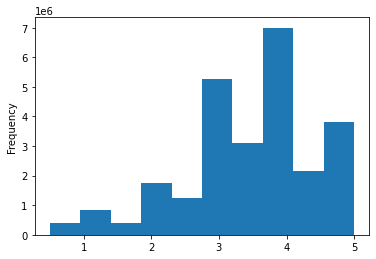

In [271]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()